In [ ]:
#Version Python naïve de CoAT

import numpy as np
from itertools import combinations

def similarity_Y(x, y)->int: #mesure de similarité "=" "="
  
    return int(x == y) 


def similarity_X(x1,y1,x2,y2) :
    """ Mesure de similarité des situations """
    norme=np.sqrt((x2-x1)**2+(y2-y1)**2)
    return 1/(1+norme)



def indexes_triplet(data):
    #renvoie tous les triplets d'indices possibles (i,j,k) dans data

    n=len(data)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                yield (i, j, k)



def compute_complexity(data)->int: 
    """ Calcule la complexité en comptant les inversions de similarité. """
    cmp: int = 0 #Initialisation du compteur d'inversions de similarité

    #il faut voir sur les triplets 
    for (i, j, k) in indexes_triplet(data):
        #mesure de similarité 
        data_i1 ,data_i2 = data[i][0], data[i][1]
        data_j1 ,data_j2 = data[j][0], data[j][1]
        data_k1 ,data_k2 = data[k][0], data[k][1]
        
        #sigma_X: mesure de similarité sur les entrées 
        #sigma_Y : mesure de similarité sur les sorties

        simX_i_j = similarity_X(data_i1, data_j1) #sigma_X
        simY_i_j = similarity_Y(data_i2, data_j2) #sigma_Y
        simX_i_k = similarity_X(data_i1, data_k1) #sigma_X
        simY_i_k = similarity_Y(data_i2, data_k2) #sigma_Y

        cmp += int(simX_i_j >= simX_i_k and simY_i_j < simY_i_k) #inversion de similarité

    return cmp 

def coat_predict(x_new, CB, ys_unique):
    """ Prédit l'issue qui minimise la complexité. """
    # CB est une liste (data)
    
    CB_new=CB.copy() #copie de la base de données
    list_res = []
    for y in ys_unique:
        z_new = (x_new, y) 
        CB_new = CB_new + [z_new] #ajout de la nouvelle situation à la base de données
        res = compute_complexity(CB_new) 
        list_res.append(res)

    #On cherche la valeur de y qui minimise la complexité
    min_index = list_res.index(min(list_res)) #index de la valeur de y qui minimise la complexité
    return ys_unique[min_index] 



In [ ]:
#Version python en 0(n²) pour la prédiction de la classe d'un point

import numpy as np
from itertools import combinations

def similarity_Y(x, y)->int: #mesure de similarité "="
  
    return int(x == y) 


def similarity_X(x1,x2) :
    """ Mesure de similarité des situations """
    norme=np.sqrt((x2[0]-x1[0])**2+(x2[1]-x1[1])**2)
    return 1/(1+norme)




def indexes_couple(data):
    #renvoie tous les couples d'indices possibles (i,j) dans data

    n=len(data)
    for i in range(n):
        for j in range(n):
            yield (i, j)



def evaluate_triplet_inversion(data1,data2,data3) :
    data_i1 ,data_i2 = data1[0], data1[1]
    data_j1 ,data_j2 = data2[0], data2[1]
    data_k1 ,data_k2 = data3[0], data3[1]
        
    #sigma_X: mesure de similarité sur les entrées 
    #sigma_Y : mesure de similarité sur les sorties

    simX_i_j = similarity_X(data_i1, data_j1) #sigma_X
    simY_i_j = similarity_Y(data_i2, data_j2) #sigma_Y
    simX_i_k = similarity_X(data_i1, data_k1) #sigma_X
    simY_i_k = similarity_Y(data_i2, data_k2) #sigma_Y

    return int(simX_i_j >= simX_i_k and simY_i_j < simY_i_k) #inversion de similarité



def compute_complexity_optimized(data,z_new):
    """ Calcule la complexité en O(n²) . """
    cmp: int = 0 #Initialisation du compteur d'inversions de similarité
 
    for (i, j) in indexes_couple(data):
        cmp += evaluate_triplet_inversion(z_new,data[i],data[j])
        
    for (i, j) in indexes_couple(data):
        cmp += evaluate_triplet_inversion(data[i],z_new,data[j])
        
    for (i, j) in indexes_couple(data):
        cmp += evaluate_triplet_inversion(data[i],data[j],z_new)

    for i in range(0,len(data)):
        cmp += evaluate_triplet_inversion(z_new,z_new,data[i])

    for i in range(0,len(data)):
        cmp += evaluate_triplet_inversion(z_new,data[i],z_new)

    for i in range(0,len(data)):
        cmp += evaluate_triplet_inversion(data[i],z_new,z_new)
    
    return cmp 

def coat_predict_optimized(x_new, CB, ys_unique):
    """ Prédit l'issue qui minimise la complexité. """
    # CB est une liste (data)
    
    CB_new=CB.copy() #copie de la base de données
    list_res = []
    for y in ys_unique:
        z_new = (x_new, y) 
        CB_new = CB_new + [z_new] #ajout de la nouvelle situation à la base de données
        res = compute_complexity_optimized(CB_new,z_new) 
        list_res.append(res)

    #On cherche la valeur de y qui minimise la complexité
    min_index = list_res.index(min(list_res)) #index de la valeur de y qui minimise la complexité
    return ys_unique[min_index] 




In [ ]:
#TESTS versions Python

In [ ]:

import random
import math
import numpy as np
import timeit

def point_aleatoire_cercle(x, y, r,label):
    """ x,y : centre du cercle
        r : rayon du cercle 
        label : classe des points générer"""
    theta = random.uniform(0, 2 * math.pi)
    
    rho = math.sqrt(random.uniform(0, 1)) * r  # Générer un rayon aléatoire entre 0 et r, en tenant compte de la densité uniforme
    
    px = x + rho * math.cos(theta)
    py = y + rho * math.sin(theta)
    return (px,py),label

def case_base(x1, y1, r1,label1,n1,x2, y2, r2,label2,n2) :
    """ n1 : nombre de point de la première classe à générer
        n2 : nombre de point de la deuxième classe à générer
        Retourne un ensemble de n1+n2 triplet qui correspond à l'ensemble des cas de base"""
    CB = []
    for i in range (0,n1) :
        CB.append(point_aleatoire_cercle(x1, y1, r1,label1))
        
    for i in range (0,n2) :
        CB.append(point_aleatoire_cercle(x2, y2, r2,label2))
    return CB

CB = case_base(3,3,1,"rouge",50,-3,-3,1,"bleu",50)
ys = ["rouge","bleu"]
point_test = (1, 1)

# Timer pour la version non optimisée
t1 = timeit.Timer(lambda: coat_predict(point_test, CB, ys))
# Timer pour la version optimisée
t2 = timeit.Timer(lambda: coat_predict_optimized(point_test, CB, ys))
#ict_opt

temps1 = t1.timeit(number=10) / 100
temps2 = t2.timeit(number=10) / 100

print(f"coat_predict : {temps1:.6f} secondes en moyenne sur 10 appels")
print(f"coat_predict_optimized : {temps2:.6f} secondes en moyenne sur 100appels")



coat_predict : 9.101215 secondes en moyenne sur 10 appels
coat_predict_optimized : 0.290491 secondes en moyenne sur 10 appels


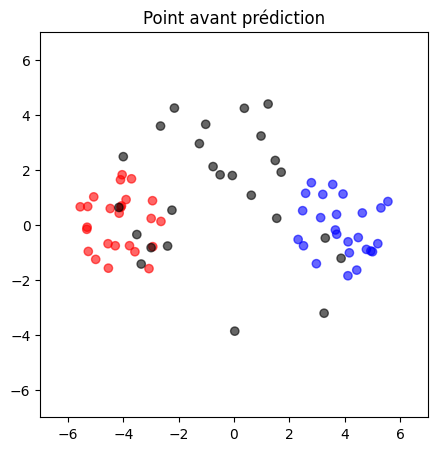

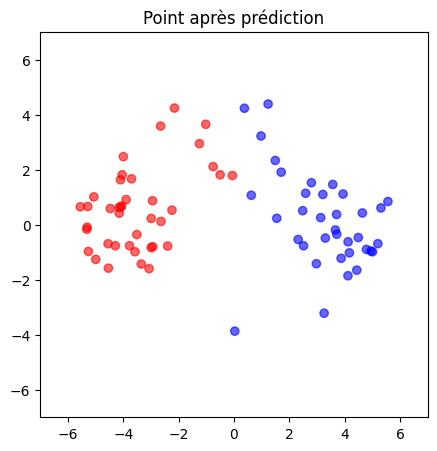

In [ ]:
def point_aleatoire_cercle(x, y, r):
    """ x,y : centre du cercle
        r : rayon du cercle 
        """
    theta = random.uniform(0, 2 * math.pi)
    
    rho = math.sqrt(random.uniform(0, 1)) * r  # Générer un rayon aléatoire entre 0 et r, en tenant compte de la densité uniforme
    
    px = x + rho * math.cos(theta)
    py = y + rho * math.sin(theta)
    return px,py

def case_base(x1, y1, r1,label1,n1,x2, y2, r2,label2,n2) :
    """ n1 : nombre de point de la première classe à générer
        n2 : nombre de point de la deuxième classe à générer
        Retourne un ensemble de n1+n2 triplet qui correspond à l'ensemble des cas de base"""
    CB = []
    for i in range (0,n1) :
        x,y = point_aleatoire_cercle(x1, y1, r1)
        CB.append(((x,y),label1))
        
    for i in range (0,n2) :
        x,y = point_aleatoire_cercle(x2, y2, r1)
        CB.append(((x,y),label2))
    return CB

CB = case_base(-4, 0, 2,"red",25,4, 0, 2,"blue",25)
CB2 = CB.copy()
set_class = ["red","blue"]

for i in range(0,25) :
    xnew,ynew = point_aleatoire_cercle(0, 0, 5)
    CB.append(((xnew,ynew),"black")) # Ajout du point à prédire (pas de couleur encore)
    predicted_class = coat_predict_optimized((xnew,ynew),CB,set_class)
    CB2.append(((xnew,ynew),predicted_class))
    
c,label = zip(*CB)
x,y = zip(*c)

plt.figure(figsize=(5,5))
plt.scatter(x, y, color=label, alpha=0.6)
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("Point avant prédiction")
plt.show()


c,label = zip(*CB2)
x,y = zip(*c)

plt.figure(figsize=(5,5))
plt.scatter(x, y, color=label, alpha=0.6, )
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("Point après prédiction")
plt.show()


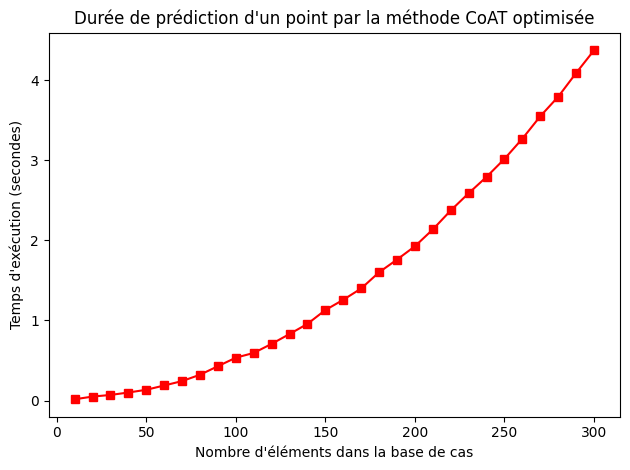

In [ ]:
import random
import math
import numpy as np
import timeit

def point_aleatoire_cercle(x, y, r):
    """ x,y : centre du cercle
        r : rayon du cercle 
        """
    theta = random.uniform(0, 2 * math.pi)
    
    rho = math.sqrt(random.uniform(0, 1)) * r  # Générer un rayon aléatoire entre 0 et r, en tenant compte de la densité uniforme
    
    px = x + rho * math.cos(theta)
    py = y + rho * math.sin(theta)
    return px,py

def case_base(x1, y1, r1,label1,n1,x2, y2, r2,label2,n2) :
    """ n1 : nombre de point de la première classe à générer
        n2 : nombre de point de la deuxième classe à générer
        Retourne un ensemble de n1+n2 triplet qui correspond à l'ensemble des cas de base"""
    CB = []
    for i in range (0,n1) :
        x,y = point_aleatoire_cercle(x1, y1, r1)
        CB.append(((x,y),label1))
        
    for i in range (0,n2) :
        x,y = point_aleatoire_cercle(x2, y2, r1)
        CB.append(((x,y),label2))
    return CB

#CB = case_base(3,3,1,"rouge",15,-3,-3,1,"bleu",15)
ys = ["rouge", "bleu"]
point_test = (1, 1)

i_values = []
temps_predict = []
temps_predict_optimized = []

for i in range(1, 31):
    CB = case_base(3, 3, 1, "rouge", i * 5, -3, -3, 1, "bleu", i * 5)

    #t1 = timeit.Timer(lambda: coat_predict(point_test, CB, ys))
    t2 = timeit.Timer(lambda: coat_predict_optimized(point_test, CB, ys))

    #temps1 = t1.timeit(number=1)
    temps2 = t2.timeit(number=1)

    # Stockage des résultats
    i_values.append(10*i)
    #temps_predict.append(temps1)
    temps_predict_optimized.append(temps2)

    #print(f"coat_predict : {temps1:.6f} secondes")
    #print(f"coat_predict_optimized : {temps2:.6f} secondes")

# Création du graphique
"""
plt.plot(i_values, temps_predict, marker='o')
plt.xlabel("Nombre d'éléments dans la base de cas")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Durée de prédiction d'un point par la méthode CoAT naïve")
plt.tight_layout()
plt.savefig("grph3.png")
plt.show()
"""
plt.plot(i_values, temps_predict_optimized, marker='s',color='red')
plt.xlabel("Nombre d'éléments dans la base de cas")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Durée de prédiction d'un point par la méthode CoAT optimisée")
plt.tight_layout()
plt.savefig("grph4.png")
plt.show()

In [ ]:
#Version PyTorch optimisée de CoAT


import torch


def optimized_euclidean_distance(A, B):
    A_sq = torch.sum(A**2, dim=-1).unsqueeze(1)  # (n,1)
    B_sq = torch.sum(B**2, dim=-1).unsqueeze(0)  # (1,m)
    AB = torch.matmul(A, B.T)  # (n,m)
    distances = A_sq + B_sq - 2 * AB  # (n,m)
    return 1/(1+distances)


def sim_T_CB_1(T_X: torch.Tensor, CB_X: torch.Tensor) -> torch.Tensor:
    """
    Calcule la distance euclidienne au carré entre chaque point de T et chaque point de CB
    en utilisant la fonction optimisée.
    Args:
        T (Tensor): (p, d) points à tester
        CB (Tensor): (n+m, d) cas de base
    Returns:
        Tensor: (p, n+m) matrice des distances euclidiennes au carré
    """
    return optimized_euclidean_distance(T, CB)

def sim_T_CB_2(T_Y: torch.Tensor, CB_Y: torch.Tensor) -> torch.Tensor:
    """
    Calcule la similarité de couleur entre les points de T et CB.

    Args:
        T (Tensor): (p, d+1) — chaque ligne est (x₁, ..., x_d, couleur)
        CB (Tensor): (n+m, d+1) — idem

    Returns:
        Tensor: (p, n+m), où chaque élément vaut 1 si les couleurs sont identiques, 0 sinon.
    """
    T_colors = T[:, -1].long()      # (p,)
    CB_colors = CB[:, -1].long()    # (n+m,)
    return (T_colors.unsqueeze(1) == CB_colors.unsqueeze(0)).float()


def compute_incompatibility(sim_T_CB_1: torch.Tensor, sim_T_CB_2: torch.Tensor) -> torch.Tensor:
    """
    Calcule l'incompatibilité pour chaque point de T.

    Args:
        sim_T_CB_1 (Tensor): (p, n+m) distances euclidiennes au carré
        sim_T_CB_2 (Tensor): (p, n+m) similarités de couleur (0 ou 1)

    Returns:
        Tensor: (p,) incompatibilité pour chaque point de T
    """
    p, nm = sim_T_CB_1.shape

    # On étend sim_T_CB_1 sur la 3e dimension pour comparer j et k
    sim1_j = sim_T_CB_1.unsqueeze(2)  # (p, n+m, 1)
    sim1_k = sim_T_CB_1.unsqueeze(1)  # (p, 1, n+m)
    relation_1 = (sim1_j >= sim1_k)   # (p, n+m, n+m)

    # Même principe pour sim_T_CB_2
    sim2_j = sim_T_CB_2.unsqueeze(2)  # (p, n+m, 1)
    sim2_k = sim_T_CB_2.unsqueeze(1)  # (p, 1, n+m)
    relation_2 = (sim2_j < sim2_k)    # (p, n+m, n+m)

    # Combinaison logique
    relation = relation_1 & relation_2  # (p, n+m, n+m)

    # Somme sur les dimensions j et k
    incompatibility_c = torch.sum(relation,dim=(1, 2))  # (p,)

    return incompatibility_c


def predict_COAT(T: torch.Tensor, CB: torch.Tensor, Q: int) -> torch.Tensor:
    """
    Prédit la couleur de chaque point de T selon le classifieur COAT.

    Args:
        T (Tensor): (p, d+1), les derniers éléments de chaque ligne peuvent être quelconques (ils seront écrasés)
        CB (Tensor): (n+m, d+1), contient les points de A ∪ B avec leurs vraies couleurs
        Q (int): nombre de couleurs possibles (classes)

    Returns:
        Tensor: (p,) prédictions de couleur (0 ≤ c < Q) pour chaque point de T
    """
    p, d_plus_1 = T.shape
    d = d_plus_1 - 1
    incompatibilite = torch.zeros((p, Q), device=T.device)

    for c in range(Q):
        # Créer une copie de T avec la couleur courante c affectée à tous les points
        T_colored = T.clone()
        T_colored[:, -1] = c  # on écrase la couleur (dans la dernière colonne)

        # Calcul des similarités
        sim1 = sim_T_CB_1(T_colored, CB)  # (p, n+m)
        sim2 = sim_T_CB_2(T_colored, CB)  # (p, n+m)

        # Calcul de l'incompatibilité pour cette couleur
        incompatibilite[:, c] = compute_incompatibility(sim1, sim2)

    # Pour chaque point, choisir la classe qui minimise l'incompatibilité
    #print("incompatibilité:",incompatibilite)
    resultats = torch.argmin(incompatibilite, dim=1)  # (p,)
    return resultats


# Vérifie si CUDA est disponible
if torch.cuda.is_available():
    print("CUDA is available with GPU!")
    device = torch.device("cuda")
else:
    print("CUDA is not available with GPU, using CPU.")
    device = torch.device("cpu")



CUDA is available with GPU!


In [ ]:
#TESTS Version PyTorch optimisée

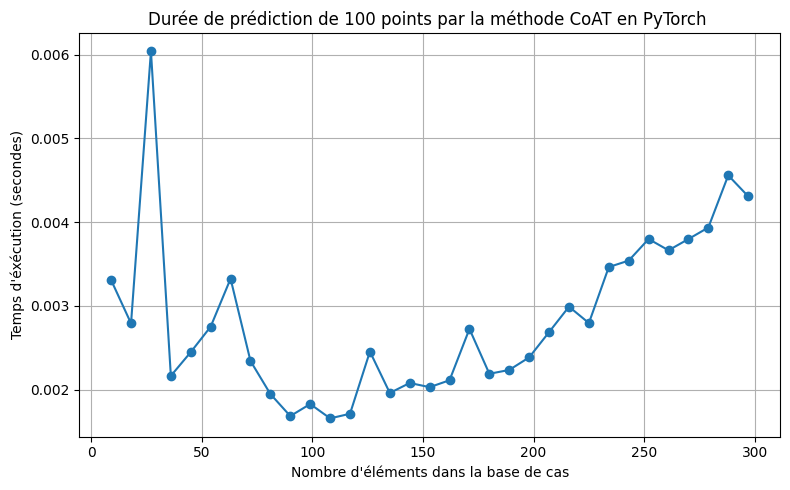

In [347]:
import torch
import matplotlib.pyplot as plt
import time

# Utilisation GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paramètres
Q = 2               # Nombre de classes
d = 2               # Dimension
p = 100           # Taille du batch à prédire (fixe)
base_sizes = list(range(9, 301, 9))  # Tailles de CB à tester (de 20 à 300)

# Points à prédire (fixe)
T_coords = torch.cat([
    torch.randn(p // 2, d) * 0.2 + torch.tensor([0.0, 0.0]),
    torch.randn(p - p // 2, d) * 0.2 + torch.tensor([3.0, 3.0])
], dim=0)
T = torch.cat([T_coords, -torch.ones(p, 1)], dim=1).to(device)

# Stockage des durées
durations = []

for base_size in base_sizes:
    n = base_size // 2
    m = base_size - n

    # Génération de CB (rouges et bleus)
    A_coords = torch.randn(n, d) * 0.2 + torch.tensor([0.0, 0.0])
    A_labels = torch.zeros(n, 1)
    A = torch.cat([A_coords, A_labels], dim=1).to(device)

    B_coords = torch.randn(m, d) * 0.2 + torch.tensor([3.0, 3.0])
    B_labels = torch.ones(m, 1)
    B = torch.cat([B_coords, B_labels], dim=1).to(device)

    CB = torch.cat([A, B], dim=0).to(device)

    # Mesure du temps de prédiction (batch entier)
    torch.cuda.synchronize() if device.type == "cuda" else None
    start = time.time()
    preds = predict_COAT(T, CB, Q)
    torch.cuda.synchronize() if device.type == "cuda" else None
    elapsed = time.time() - start

    durations.append(elapsed)
    #print(f"Taille base = {base_size}, durée = {elapsed:.6f} s")

# Tracé du graphe
plt.figure(figsize=(8, 5))
plt.plot(base_sizes, durations, marker='o')
plt.title("Durée de prédiction de 100 points par la méthode CoAT en PyTorch ")
plt.xlabel("Nombre d'éléments dans la base de cas")
plt.ylabel("Temps d'éxécution (secondes)")
plt.grid(True)
plt.tight_layout()
plt.show()



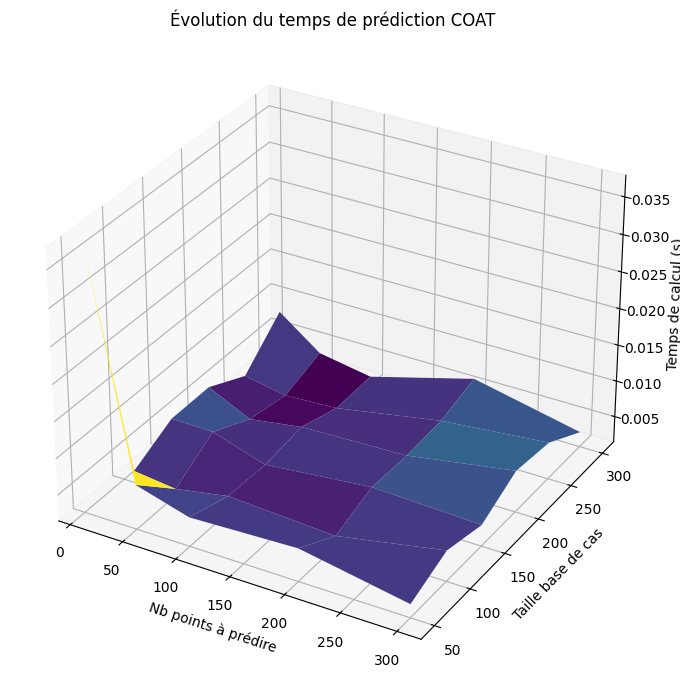

In [ ]:
import torch
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Hypothèse : tu as déjà `predict_COAT` défini, ainsi que `device`

d = 2
Q = 2

# Tailles variables
base_sizes = [50, 100, 150, 200, 250, 300]
predict_sizes = [10, 50, 100, 200, 300]
Z = np.zeros((len(base_sizes), len(predict_sizes)))

for i, base_size in enumerate(base_sizes):
    # Base de cas (moitié rouge, moitié bleue)
    n = m = base_size // 2
    A = torch.randn(n, d) * 0.2 + torch.tensor([0.0, 0.0])
    B = torch.randn(m, d) * 0.2 + torch.tensor([3.0, 3.0])
    A = torch.cat([A, torch.zeros(n, 1)], dim=1)
    B = torch.cat([B, torch.ones(m, 1)], dim=1)
    CB = torch.cat([A, B], dim=0).to(device)

    for j, pred_size in enumerate(predict_sizes):
        T_coords = torch.cat([
            torch.randn(pred_size // 2, d) * 0.2 + torch.tensor([0.0, 0.0]),
            torch.randn(pred_size // 2, d) * 0.2 + torch.tensor([3.0, 3.0])
        ], dim=0)
        T = torch.cat([T_coords, -torch.ones(pred_size, 1)], dim=1).to(device)

        start = time.time()
        _ = predict_COAT(T, CB, Q)
        elapsed = time.time() - start

        Z[i, j] = elapsed

# Conversion en grilles pour 3D
X, Y = np.meshgrid(predict_sizes, base_sizes)

# --- Tracé ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel("Nb points à prédire")
ax.set_ylabel("Taille base de cas")
ax.set_zlabel("Temps de calcul (s)")
ax.set_title("Évolution du temps de prédiction COAT")

plt.tight_layout()
plt.show()


In [424]:
import torch
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir predict_COAT et device comme avant
d = 2
Q = 2

# Dimensions variables
predict_sizes = list(range(40, 401, 40))
test_sizes = list(range(40, 501, 40))

#predict_sizes = [10, 50, 100, 200, 300]
#base_sizes = [50, 100, 150, 200, 250, 300]

Z = np.zeros((len(predict_sizes), len(base_sizes)))

for i, pred_size in enumerate(predict_sizes):
    for j, base_size in enumerate(base_sizes):
        n = m = base_size // 2

        # Génération base de cas
        A = torch.randn(n, d) * 0.2 + torch.tensor([0.0, 0.0])
        B = torch.randn(m, d) * 0.2 + torch.tensor([3.0, 3.0])
        A = torch.cat([A, torch.zeros(n, 1)], dim=1)
        B = torch.cat([B, torch.ones(m, 1)], dim=1)
        CB = torch.cat([A, B], dim=0).to(device)

        # Points à prédire
        T_coords = torch.cat([
            torch.randn(pred_size // 2, d) * 0.2 + torch.tensor([0.0, 0.0]),
            torch.randn(pred_size // 2, d) * 0.2 + torch.tensor([3.0, 3.0])
        ], dim=0)
        T = torch.cat([T_coords, -torch.ones(pred_size, 1)], dim=1).to(device)

        # Calcul du temps
        start = time.time()
        _ = predict_COAT(T, CB, Q)
        elapsed = time.time() - start

        Z[i, j] = elapsed

# Création de la grille X (nb de points) et Y (taille base de cas)
X, Y = np.meshgrid(predict_sizes, base_sizes, indexing='ij')

# --- Tracé ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel("Nombre de points à prédire")
ax.set_ylabel("Nombre d'éléments dans la base de cas")
ax.set_zlabel("Temps de calcul (s)")
#ax.set_title("Temps de prédiction COAT en fonction de la base et des requêtes")

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
